In [1]:
import matplotlib.pyplot as plt
from flyplotlib.leg import mushow, Segment as S

In [2]:
eff_conn = {
    S.PLEURAL_REMOTOR_AND_ABDUCTOR: 0.018,
    # alternatively, convert from string:
    # S.from_str("Pleural remotor/abductor MN"): 0.018,
    S.STERNAL_ANTERIOR_ROTATOR: -0.533,
    S.STERNAL_POSTERIOR_ROTATOR: -0.158,
    S.TERGOPLEURAL_OR_PLEURAL_PROMOTOR: 0.220,
    S.STERNAL_ADDUCTOR: -0.638,
    S.TERGOTROCHANTER_EXTENSOR: -0.117,
    S.STERNOTROCHANTER_EXTENSOR: -0.039,
    S.TROCHANTER_EXTENSOR: -0.103,
    S.TROCHANTER_FLEXOR: 0.138,
    S.ACCESSORY_TROCHANTER_FLEXOR: -0.115,
    S.FEMUR_REDUCTOR: -0.036,
    S.TIBIA_EXTENSOR: 0.707,
    S.TIBIA_FLEXOR: 0.089,
    S.ACCESSORY_TIBIA_FLEXOR: 0.005,
    S.LONG_TENDON_MUSCLE_1: -0.168,
    S.LONG_TENDON_MUSCLE_2: 0.000,
    S.TARSUS_LEVATOR: -1.000,
    S.TARSUS_DEPRESSOR: -0.492,
}

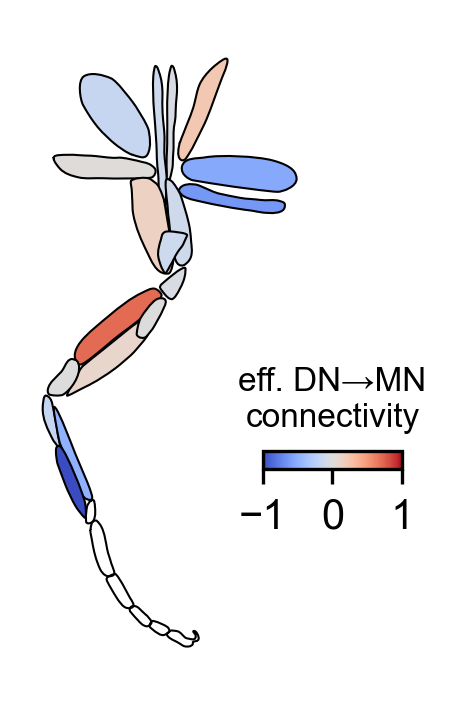

In [3]:
plt.rcParams["font.family"] = "Arial"
fig, ax = plt.subplots(figsize=(2, 4), dpi=300)
paths, scalar_mappable = mushow(
    eff_conn, cmap="coolwarm", vmin=-1, vmax=1, linewidth=0.5
)
ax.set_aspect("equal")
ax.axis("off")
cb = fig.colorbar(
    scalar_mappable,
    ax=ax,
    shrink=0.3,
    aspect=8,
    anchor=(1, 4),
    orientation="horizontal",
)
cb.ax.set_title("eff. DN→MN\nconnectivity", pad=6, fontsize=8)
fig.savefig("effective_connectivity.png")

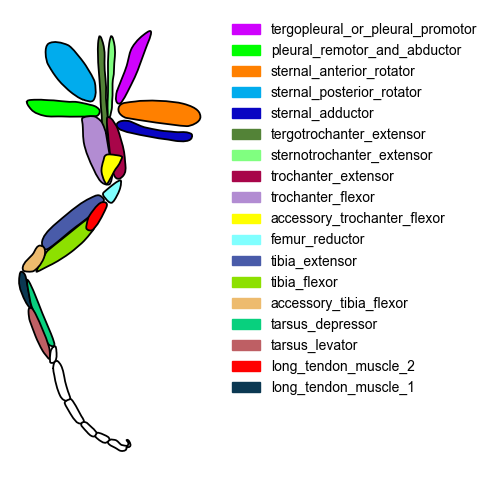

In [4]:
from distinctipy import get_colors
from flyplotlib import add_muscles, Segment
from matplotlib.patches import Patch

segments = list(Segment)[:-6]
colors = get_colors(len(segments), rng=0)
color_dict = dict(zip(segments, colors))
plt.rcParams["font.family"] = "Arial"
fig, ax = plt.subplots(figsize=(12, 6))
patches = add_muscles(
    ax=ax, per_path_kwargs={"facecolor": color_dict}, force_patches=True
)
ax.legend(
    handles=[Patch(color=color_dict[s], label=s.value) for s in segments],
    labels=[s.value for s in segments],
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    frameon=False,
)
ax.set_aspect(1)
ax.axis("off")
fig.savefig("mn.png")

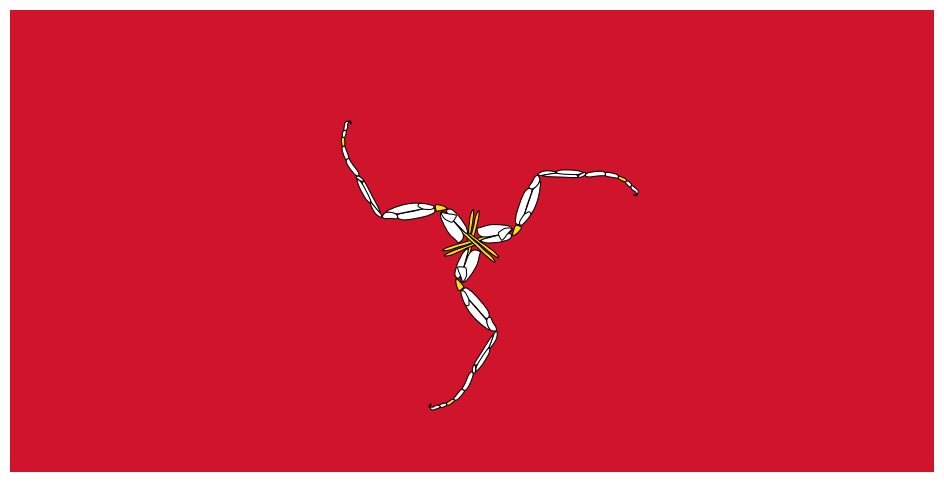

In [5]:
fig, ax = plt.subplots(figsize=(12, 6))
for i in range(3):
    patches = add_muscles(
        facecolor="w",
        origin=(0.75, -0.05),
        rotation=-10 + 120 * i,
        scale=(-1, -1),
        per_path_kwargs={
            "visible": {
                S.TERGOPLEURAL_OR_PLEURAL_PROMOTOR: False,
                S.PLEURAL_REMOTOR_AND_ABDUCTOR: False,
                S.STERNAL_POSTERIOR_ROTATOR: False,
                S.STERNAL_ANTERIOR_ROTATOR: False,
                S.STERNAL_ADDUCTOR: False,
            },
            "facecolor": {
                S.TERGOTROCHANTER_EXTENSOR: "#f9dd16",
                S.STERNOTROCHANTER_EXTENSOR: "#f9dd16",
                S.TARSUS_3: "#f9dd16",
                S.FEMUR_REDUCTOR: "#f9dd16",
            },
        },
        bbox_exclude=[
            S.TERGOPLEURAL_OR_PLEURAL_PROMOTOR,
            S.PLEURAL_REMOTOR_AND_ABDUCTOR,
            S.TERGOTROCHANTER_EXTENSOR,
            S.STERNOTROCHANTER_EXTENSOR,
            S.STERNAL_POSTERIOR_ROTATOR,
            S.STERNAL_ANTERIOR_ROTATOR,
            S.STERNAL_ADDUCTOR,
        ],
        lw=0.75,
    )
    # alternative way to set colors if not using per_path_kwargs above:
    # patches["Tergotr."].set_facecolor("#f9dd16")

ax.set_xlim(-2.8, 2.8)
ax.set_ylim(-1.4, 1.4)
ax.set_yticks([])
ax.set_xticks([])

for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_facecolor("#CF142B")
ax.set_aspect(1)
fig.savefig("isle_of_fly.png")